In [75]:
#This notebook shows how one can classify different labels visualization
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
sns.set(style ='white',color_codes =True)

iris = pd.read_csv('Iris.csv')

iris.head()
%matplotlib inline

In [76]:
#inorder to see how many classification labels we have 
iris['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

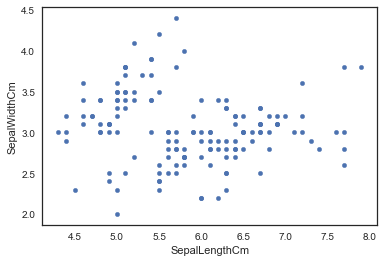

In [77]:
#let's first look how our data looks in a scatter plot
iris.plot(kind='scatter',x="SepalLengthCm", y="SepalWidthCm")

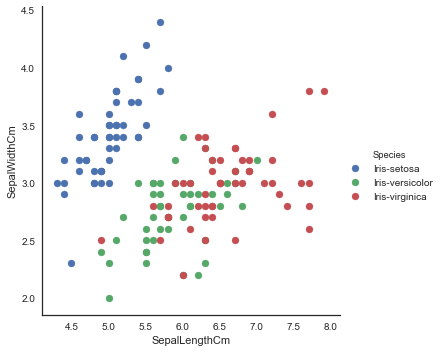

In [78]:
#as you can see we couln't distinguish different labels through this so we will use seaborn Facetgrid to color the scatter plot by different labels
sns.FacetGrid(iris ,hue='Species',size=5) \
.map(plt.scatter,"SepalLengthCm", "SepalWidthCm") \
.add_legend()

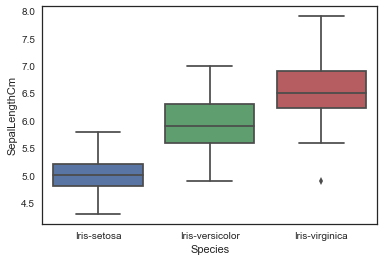

In [79]:
#we can also look at an individual feature in seaborn through a boxplot
sns.boxplot(x='Species',y="SepalLengthCm",data=iris)

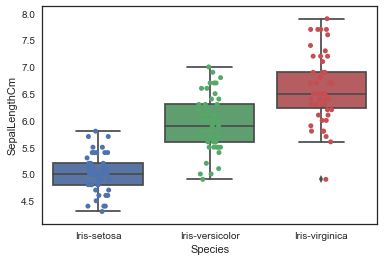

In [80]:
#one way to extend this plot by adding a layer of individual points 
#it can be done through using Seaborn's stripplot
#we will use jitter =True so that all points in a singular vertical line above this species
#save all the result in the same ax plot 
ax= sns.boxplot(x='Species',y="SepalLengthCm",data=iris)
ax =sns.stripplot(x='Species',y="SepalLengthCm",data=iris,jitter =True,edgecolor ='gray')

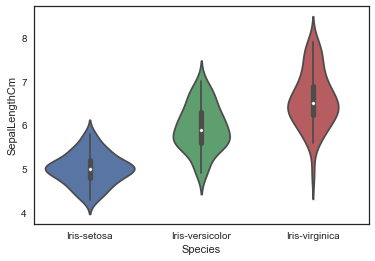

In [81]:
#A combination of boxplot and stripplot can be shown with the help of violin plot
sns.violinplot(x='Species',y="SepalLengthCm",data=iris,size=6)

C:\Users\Abhishek\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


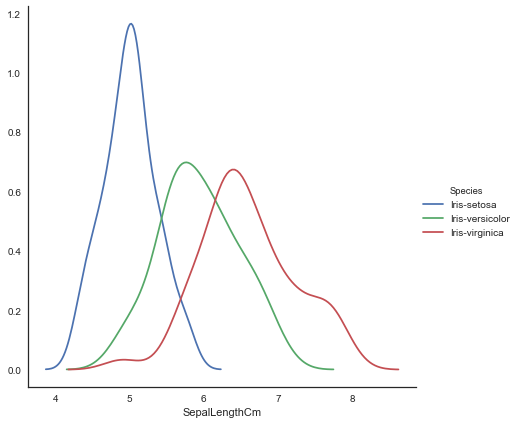

In [82]:
#a final seaborn plot useful for looking at univariate relations is kdeplot
#which creates and visualizes a kernel density estimate of the underlying feature
sns.FacetGrid(iris,hue='Species',size=6) \
.map(sns.kdeplot,"SepalLengthCm") \
.add_legend()

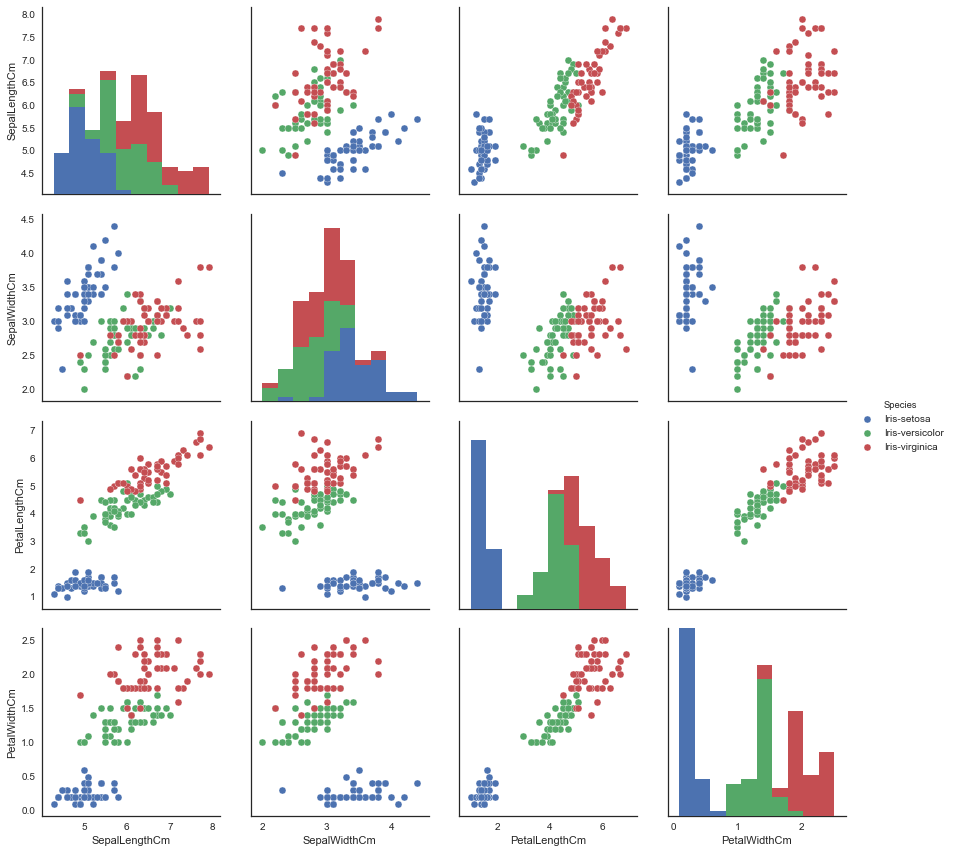

In [83]:
#in order to get the best bivariate relation between each pair of feature
sns.pairplot(iris.drop(['Id'],axis=1),hue ='Species',size =3)

C:\Users\Abhishek\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


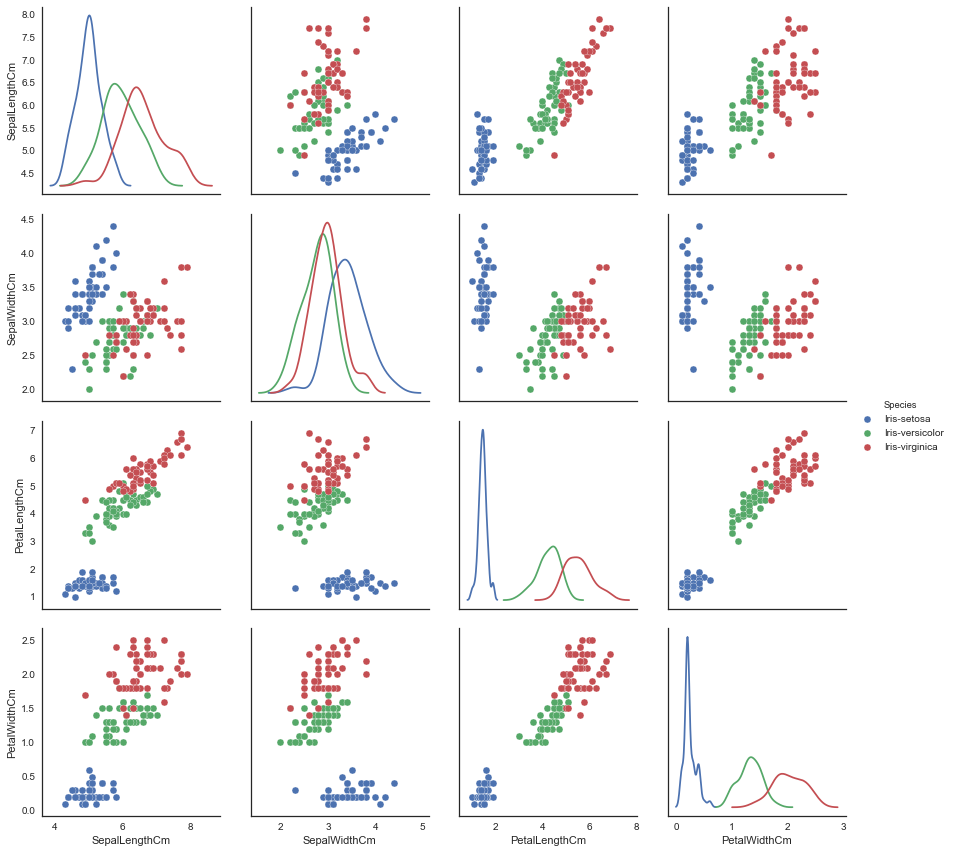

In [84]:
#the diagonal elements in pairplot by default is barplot we can change it to kde plot by
sns.pairplot(iris.drop(['Id'],axis=1),hue ='Species',size =3,diag_kind ='kde')

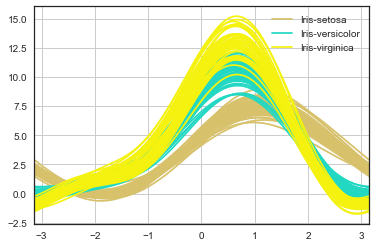

In [85]:
#andre curves using pandas
from pandas.tools.plotting import andrews_curves
andrews_curves(iris.drop("Id", axis=1), "Species")

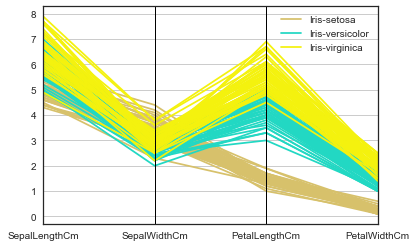

In [86]:
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(iris.drop("Id", axis=1), "Species")

In [87]:
iris = iris.drop(['Id'],axis =1)
#stabality selection
iris['Species'] = iris['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2 })

In [88]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [89]:
Y=iris.Species.values
iris = iris.drop(['Species'],axis=1)
X=iris.as_matrix()
colnames = iris.columns

In [90]:
# Define dictionary to store our rankings
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [91]:
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor


In [92]:
rlasso = RandomizedLasso(alpha =0.04)
rlasso.fit(X,Y)
ranks['rlasso/stabality'] =ranking(np.abs(rlasso.scores_),colnames)

C:\Users\Abhishek\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\randomized_l1.py:53: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  for _ in range(n_resampling)):
C:\Users\Abhishek\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\randomized_l1.py:53: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  for _ in range(n_resampling)):
C:\Users\Abhishek\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\randomized_l1.py:53: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  for _ in range(n_resampling)):
C:\Users\Abhishek\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\randomized_l1.py:53: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  for _ in range(n_resampling)):
C:\Users\Abhishek\AppData\Local\Continuum\Anaconda3\lib\site-packages\sk

In [93]:
import numpy as np
lr = LinearRegression(normalize=True)

lr.fit(X,Y)
#stop the search when only the last feature is left
rfe = RFE(lr, n_features_to_select=1, verbose =3 )
rfe.fit(X,Y)
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.


In [94]:
# Using Linear Regression
lr = LinearRegression(normalize=True)
lr.fit(X,Y)
ranks["LinReg"] = ranking(np.abs(lr.coef_), colnames)

# Using Ridge 
ridge = Ridge(alpha = 7)
ridge.fit(X,Y)
ranks['Ridge'] = ranking(np.abs(ridge.coef_), colnames)

# Using Lasso
lasso = Lasso(alpha=.05)
lasso.fit(X, Y)
ranks["Lasso"] = ranking(np.abs(lasso.coef_), colnames)

In [95]:
rf = RandomForestRegressor(n_jobs=-1, n_estimators=50, verbose=3)
rf.fit(X,Y)
ranks["RF"] = ranking(rf.feature_importances_, colnames)

building tree 1 of 50building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50

building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished


In [96]:
r = {}
for name in colnames:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)
 
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")
 
print("\t%s" % "\t".join(methods))
for name in colnames:
    print("%s\t%s" % (name, "\t".join(map(str, 
                         [ranks[method][name] for method in methods]))))

	Lasso	LinReg	RF	RFE	Ridge	rlasso/stabality	Mean
SepalLengthCm	0.0	0.12	0.0	0.33	0.12	0.21	0.13
SepalWidthCm	0.0	0.0	0.0	0.0	0.0	0.0	0.0
PetalLengthCm	1.0	0.32	0.51	0.67	0.85	0.86	0.7
PetalWidthCm	0.0	1.0	1.0	1.0	1.0	1.0	0.83


In [97]:
# Put the mean scores into a Pandas dataframe
meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])

# Sort the dataframe
meanplot = meanplot.sort('Mean Ranking', ascending=False)

C:\Users\Abhishek\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


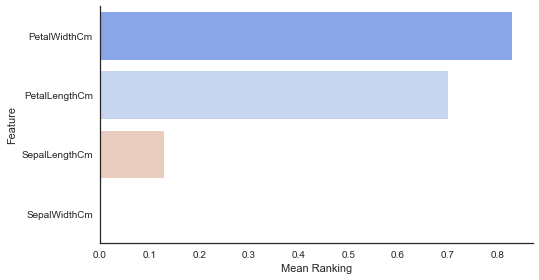

In [98]:
# Let's plot the ranking of the features
sns.factorplot(x="Mean Ranking", y="Feature", data = meanplot, kind="bar", size=4, aspect=1.9, palette='coolwarm')

In [99]:
#now it's clear that two important features in classifying labels are Petal widthCm and Petal lengthCm


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)